In [4]:
#Importing the necessary Library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [10]:
#data loading from drive

url = 'https://drive.google.com/file/d/1lV7is1B566UQPYzzY8R2ZmOritTW299S/view?usp=sharing'
path = 'https://drive.google.com/uc?export=download&id='+url.split('/')[-2]
df = pd.read_csv(path,index_col=None)

In [12]:
df.head(10)

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164
5,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Furniture,Furnishings,48.8600,7,0.00,14.1694
6,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Office Supplies,Art,7.2800,4,0.00,1.9656
7,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Technology,Phones,907.1520,6,0.20,90.7152
8,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Office Supplies,Binders,18.5040,3,0.20,5.7825
9,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Office Supplies,Appliances,114.9000,5,0.00,34.4700


In [26]:
#info of the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [23]:
#checking the description of numerical columns
df.describe()


,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [24]:
#checking the count of each categorical variable
def countOfEachCatgorical(df):
    for column in df.columns:
        if df[column].dtype == 'object':
            print("-------------{}----------".format(column))
            print(df[column].value_counts())
countOfEachCatgorical(df)            

-------------Ship Mode----------
Standard Class    5968
Second Class      1945
First Class       1538
Same Day           543
Name: Ship Mode, dtype: int64
-------------Segment----------
Consumer       5191
Corporate      3020
Home Office    1783
Name: Segment, dtype: int64
-------------Country----------
United States    9994
Name: Country, dtype: int64
-------------City----------
New York City     915
Los Angeles       747
Philadelphia      537
San Francisco     510
Seattle           428
                 ... 
Yucaipa             1
Ormond Beach        1
Pensacola           1
Citrus Heights      1
Davis               1
Name: City, Length: 531, dtype: int64
-------------State----------
California              2001
New York                1128
Texas                    985
Pennsylvania             587
Washington               506
Illinois                 492
Ohio                     469
Florida                  383
Michigan                 255
North Carolina           249
Virginia          

In [25]:
#checking the number of missing values in each columns
def nanInCol(df):
    for column in df.columns:
        print("column name -- {} ,Missing Values - {} ".format(column,df[column].isna().sum()))
nanInCol(df)        

column name -- Ship Mode ,Missing Values - 0 
column name -- Segment ,Missing Values - 0 
column name -- Country ,Missing Values - 0 
column name -- City ,Missing Values - 0 
column name -- State ,Missing Values - 0 
column name -- Postal Code ,Missing Values - 0 
column name -- Region ,Missing Values - 0 
column name -- Category ,Missing Values - 0 
column name -- Sub-Category ,Missing Values - 0 
column name -- Sales ,Missing Values - 0 
column name -- Quantity ,Missing Values - 0 
column name -- Discount ,Missing Values - 0 
column name -- Profit ,Missing Values - 0 


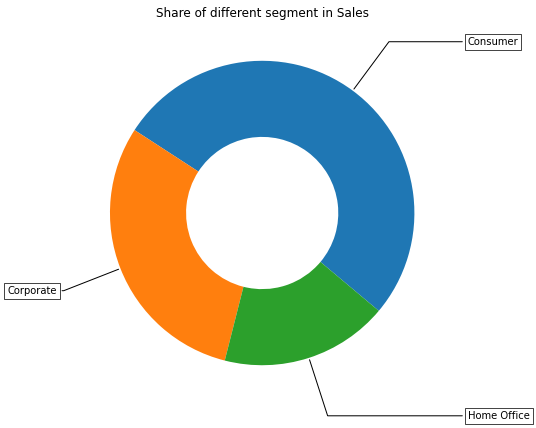

In [93]:
fig, ax = plt.subplots(figsize=(10, 7), subplot_kw=dict(aspect="equal"))

recipe = df['Segment'].value_counts().index.tolist()

data = df['Segment'].value_counts().tolist()

wedges, texts = ax.pie(data, wedgeprops=dict(width=0.5), startangle=-40)

bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.72)
kw = dict(arrowprops=dict(arrowstyle="-"),
          bbox=bbox_props, zorder=0, va="center")

for i, p in enumerate(wedges):
    ang = (p.theta2 - p.theta1)/2. + p.theta1
    y = np.sin(np.deg2rad(ang))
    x = np.cos(np.deg2rad(ang))
    horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
    connectionstyle = "angle,angleA=0,angleB={}".format(ang)
    kw["arrowprops"].update({"connectionstyle": connectionstyle})
    ax.annotate(recipe[i], xy=(x, y), xytext=(1.35*np.sign(x), 1.4*y),
                horizontalalignment=horizontalalignment, **kw)

ax.set_title("Share of different segment in Sales")

plt.show()

[2121, 6026, 1847]


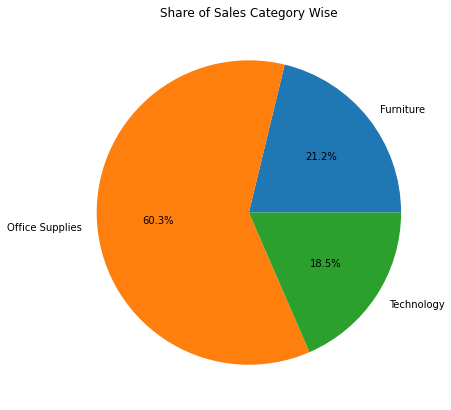

In [59]:
#calculating amount of sales category wise

sales_val = df['Sales'].groupby(df['Category']).count().values.tolist()
unique_label = df['Category'].unique().tolist()

fig = plt.figure(figsize =(10, 7)) 
print(sales_val)
#plt.pie(df['Region'].value_counts(),labels=df['Region'].value_counts().index,autopct='%1.1f%%')
plt.pie(sales_val, labels=unique_label ,autopct='%1.1f%%')  
plt.title('Share of Sales Category Wise')
# show plot 
plt.show() 

## 60.3% of the purchase was done in Office category

[2323, 2848, 1620, 3203]


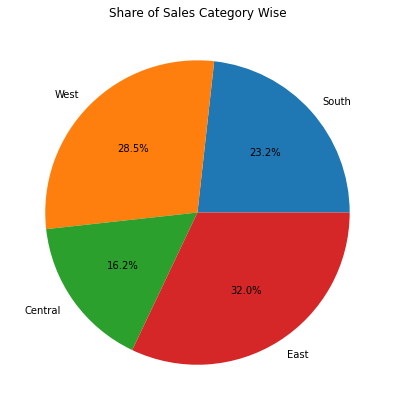

In [72]:
#calculating amount of sales Region wise

sales_val_reg = df['Sales'].groupby(df['Region']).count().values.tolist()
unique_reg = df['Region'].unique().tolist()

fig = plt.figure(figsize =(10, 7)) 
print(sales_val_reg)
#plt.pie(df['Region'].value_counts(),labels=df['Region'].value_counts().index,autopct='%1.1f%%')
plt.pie(sales_val_reg, labels=unique_reg,autopct='%1.1f%%')  
plt.title('Share of Sales Category Wise')
# show plot 
plt.show() 

### We can clearly see that East region is having sales with 32%.

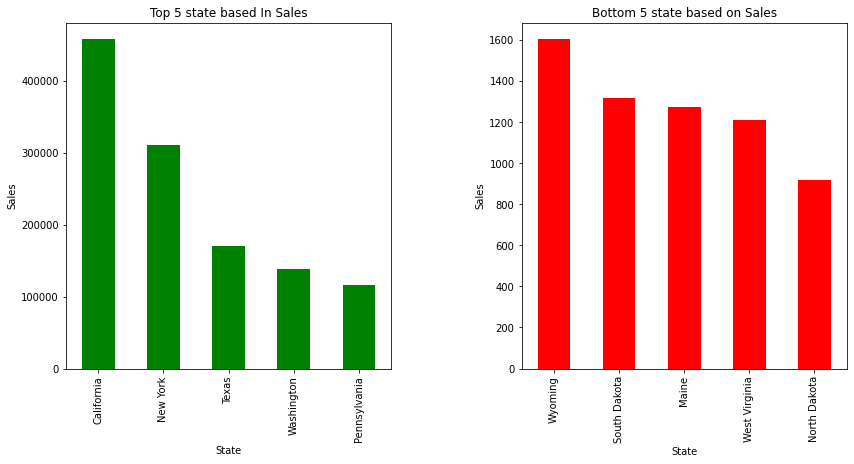

In [149]:
#STop 5 and bottom 5 State in Sales
fig, axes = plt.subplots(figsize=(14,14))
ax1=plt.subplot(2,2,1)

grpByProfit = df.groupby("State")["Sales"].sum().sort_values(ascending = False)
grpByProfit[:5].plot(kind='bar',ax=ax1,subplots=True,color="g")
plt.title("Top 5 state based In Sales")
plt.xlabel("State")
plt.ylabel("Sales")

ax2 = plt.subplot(2,2,2)
grpByProfit[-5:].plot(kind='bar',ax=ax2,subplots=True,color="r")
plt.title("Bottom 5 state based on Sales")
plt.xlabel("State")
plt.ylabel("Sales")

fig.subplots_adjust(wspace=0.4)
plt.show()

### We can see that California Neywork are the top States in Sales

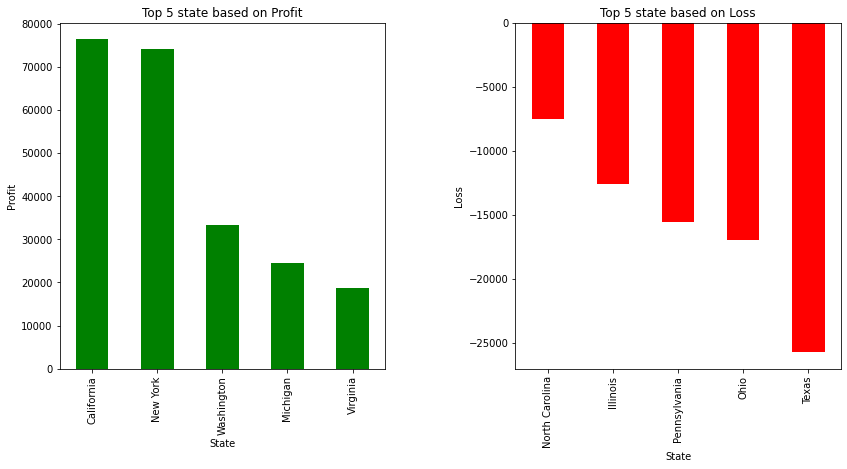

In [150]:
#STop 5 and bottom 5 State in Profit
fig, axes = plt.subplots(figsize=(14,14))
ax1=plt.subplot(2,2,1)

grpByProfit = df.groupby("State")["Profit"].sum().sort_values(ascending = False)
grpByProfit[:5].plot(kind='bar',ax=ax1,subplots=True,color="g")
plt.title("Top 5 state based on Profit")
plt.xlabel("State")
plt.ylabel("Profit")

ax2 = plt.subplot(2,2,2)
grpByProfit[-5:].plot(kind='bar',ax=ax2,subplots=True,color="r")
plt.title("Top 5 state based on Loss")
plt.xlabel("State")
plt.ylabel("Loss")

fig.subplots_adjust(wspace=0.4)
plt.show()

### We can see that California NewYork are the top States in Profit

<AxesSubplot:xlabel='Sub-Category', ylabel='count'>

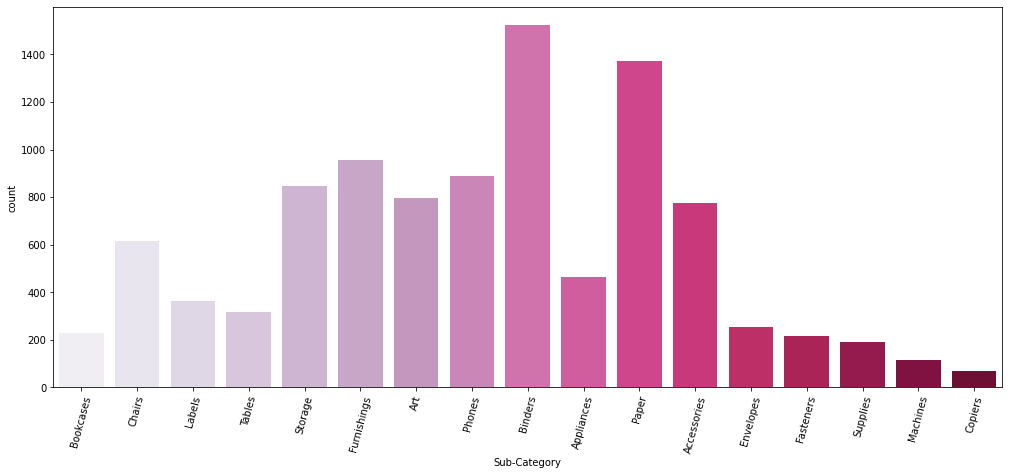

In [179]:
#top products which are sold category wise
plt.figure(figsize =(17, 7))
plt.xticks(rotation='75')
sns.countplot(x='Sub-Category',data=df,palette='PuRd')

### binders,papers and accessories are top sold product.

<AxesSubplot:xlabel='Sub-Category'>

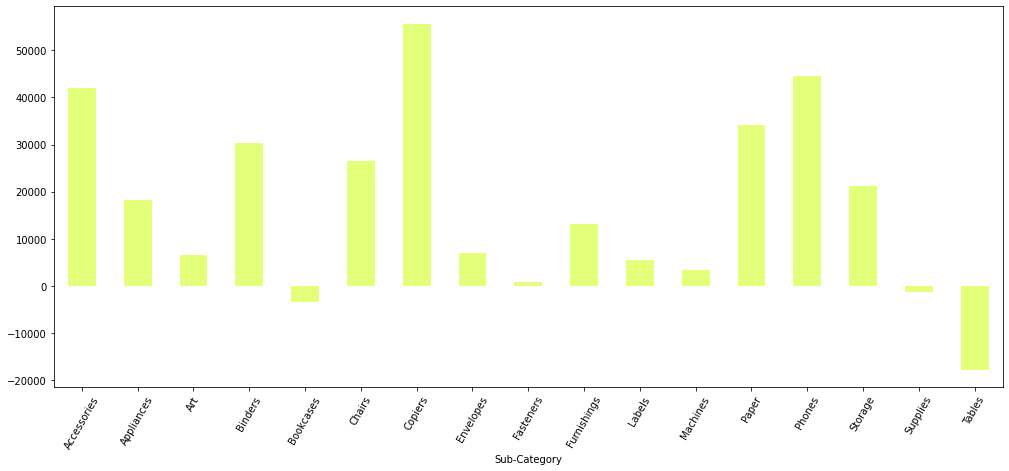

In [176]:
plt.figure(figsize =(17, 7))
df3 = df['Profit'].groupby(df['Sub-Category']).sum()

df3.plot(kind='bar',rot=60,colormap='Wistia')

#### Copiers and Accesories are the top gainers for the company, whereas Tables and Bookcases are Losser to the company

<AxesSubplot:xlabel='Region'>

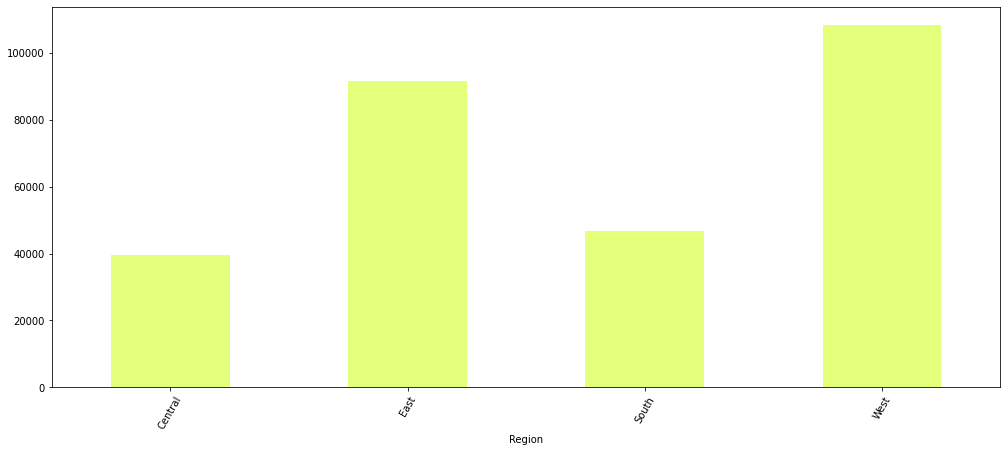

In [196]:
plt.figure(figsize =(17, 7))
df4 = df['Profit'].groupby(df['Region']).sum()

df4.plot(kind='bar',rot=60,colormap='Wistia')

<AxesSubplot:xlabel='State'>

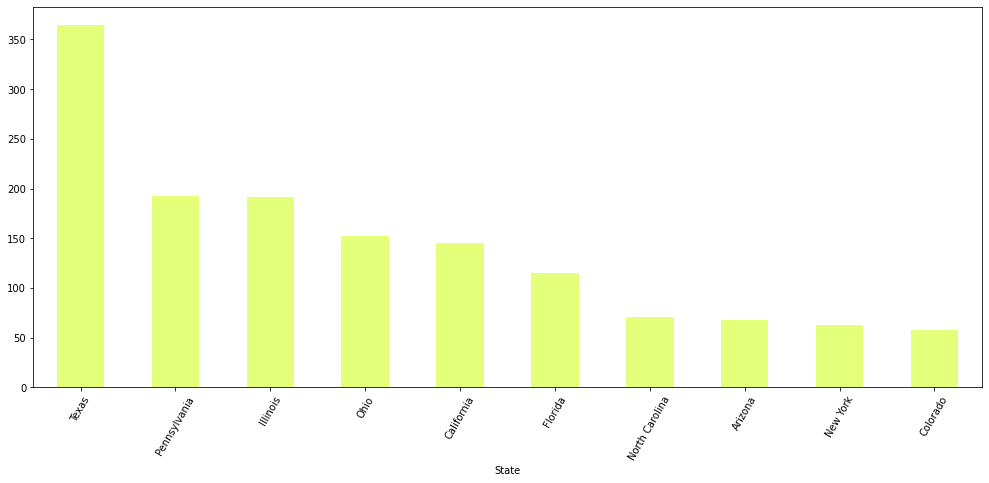

In [204]:
plt.figure(figsize =(17, 7))
df5= df['Discount'].groupby(df['State']).sum().sort_values(ascending=False)
df5[:10].plot(kind='bar',rot=60,colormap='Wistia')

<AxesSubplot:xlabel='Sub-Category'>

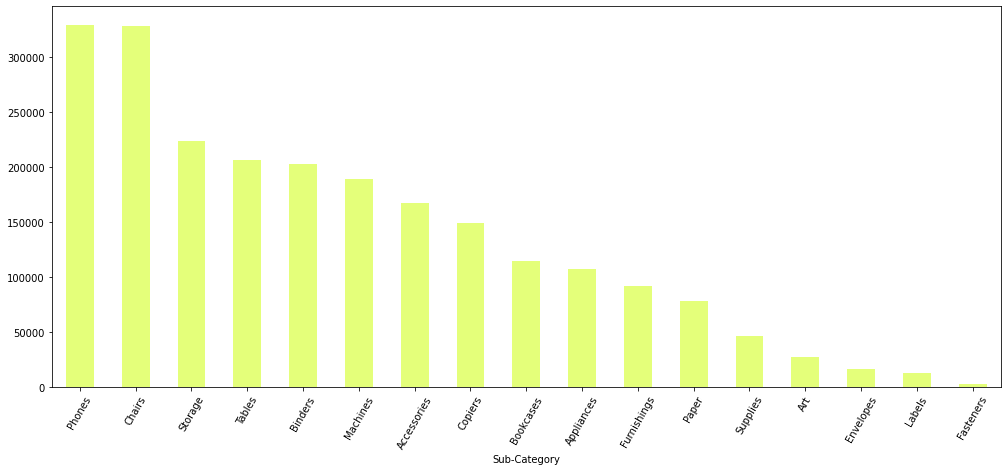

In [214]:
plt.figure(figsize =(17, 7))
df7= df['Sales'].groupby(df['Sub-Category']).sum().sort_values(ascending=False)
df7.plot(kind='bar',rot=60,colormap='Wistia')

<AxesSubplot:xlabel='Sub-Category'>

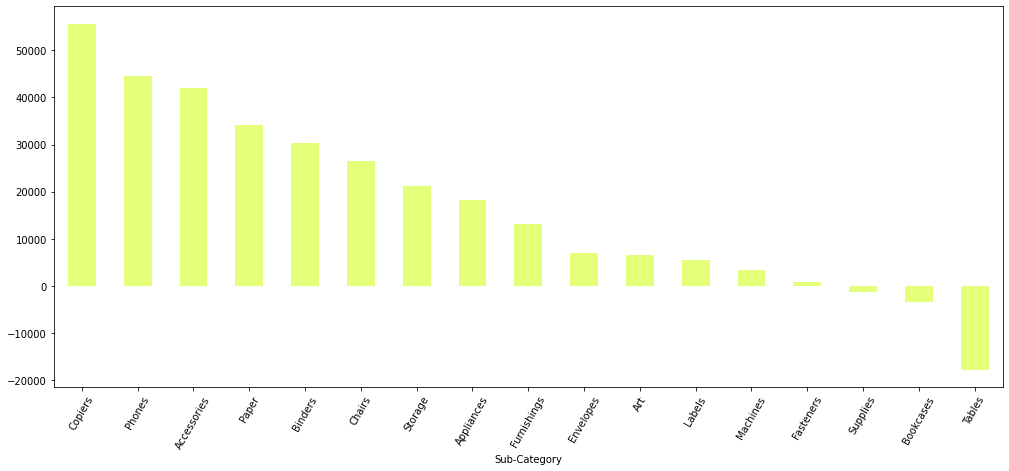

In [215]:
plt.figure(figsize =(17, 7))
df6= df['Profit'].groupby(df['Sub-Category']).sum().sort_values(ascending=False)
df6.plot(kind='bar',rot=60,colormap='Wistia')

<AxesSubplot:xlabel='Sub-Category'>

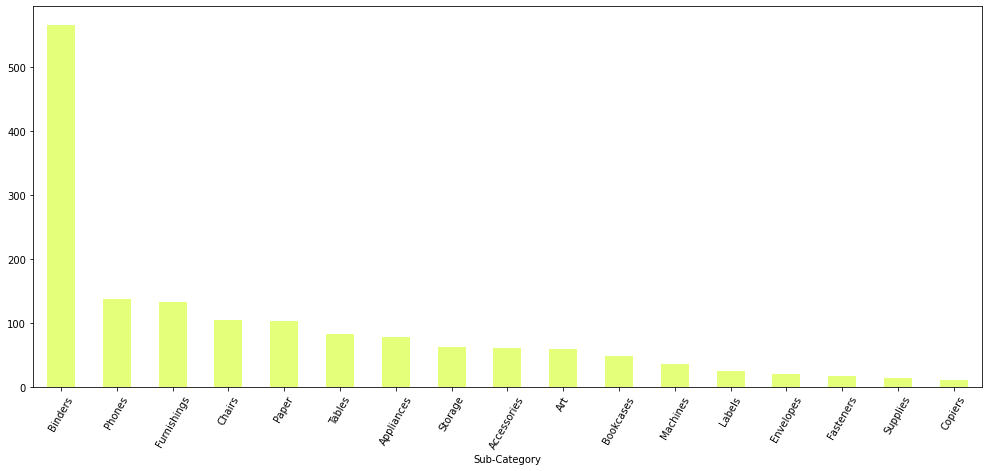

In [216]:
plt.figure(figsize =(17, 7))
df8= df['Discount'].groupby(df['Sub-Category']).sum().sort_values(ascending=False)
df8.plot(kind='bar',rot=60,colormap='Wistia')

# Insight and Suggestion from the Analysis

##### 1. We can see that most of our products are purchased by Individual Customers and Corporate and Home offices are lesser than that. So we need to improve our business for the corporate and home office sector

##### 2. Our office supplies are sold around 60.3% of total sales so we need to stock up our inventory with office supplies with some extra quantity.

##### 3. The sales East and West region with 32.0 and 28.5 % are quite good. We must extend and imorve our business for the Central Region

##### 4. Our sales are high in Caiifornia, NewYork, Texas, Washington, Pennsylvania states. We must fullfill the demand for Wyomin, South Dakota, Maine, West Virgina, North Dakota.

##### 5. We have got more profit in Caiifornia, NewYork,Washington, Michigan, Virgina states. We must think of something to improve the profit North Carolina , Illinois, Pennsylvania , Ohio, Texas. May be we can reduce the discounts for those region. Because discount is the ultimate reason behind loss in those sates

##### 5. Phones is the most sold product (in terms of cost) and second top gainers for the compay. So we must increase the demand for the phones.Binders are also key product for in terms of sales and profit we should also increase the demand for that.  Tables are also sold good in amount but it is costing loss to the company.

#### 6.Binders and Papers are the top sold product in terms of quantity.

# Thank You